In [1]:
import numpy as np
import pickle
from TFHelp import *
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import copy
import random



In [2]:
file = open("TFA_CSMatrices/learnedCSvalSigned.csv","r")
delimiter = ","
CS = [[float(y) for y in x.split(delimiter)] for x in file.readlines()]

#Get TFA matrix
file = open("TFA_CSMatrices/learnedTFAvalSignConst.csv","r")
TFAOriginal = [[float(y) for y in x.split(delimiter)] for x in file.readlines()]

#get GE Matrix
file = open("GEAll.csv","r")
GE = [[float(y) for y in x.split(delimiter)] for x in file.readlines()]

file.close()

In [ ]:
TFAVariable,TFVARange,TFVAQuality = TFAHelper.TFVA(CS,GE,TFAOriginal,outfile="TFVAResultSignConst")

Academic license - for non-commercial use only


In [3]:
TFAVariable = [[float(y) for y in x.split(delimiter)] for x in open("TFVAResultSignConst.csv","r").readlines()]
TFVARange = pickle.load(open("TFVAResultSignConstRange.pkl","rb"))
TFVAQuality = pickle.load(open("TFVAResultSignConstQuality.pkl","rb"))

In [4]:

#read in matrix
matrix = TFAVariable
TFAHelp = TFAHelper(TFAVariable)


#read in columns labels of gene expression file
columnLabelFile = "deleteome_all_mutants_controls.tsv"
geneExpression = open(columnLabelFile,"r")
columnLabels = geneExpression.readline().split("\t")[3:]

#get gene KO from column labels
realColumnLabels = []
perSample = 0
for column in columnLabels:
	if perSample == 2:
		try:
			column.index("vs. wt")
			realColumnLabels.append(str.lower(column.replace(" vs. wt","")[:-4])) 
		except:
			realColumnLabels.append(str.lower(column.replace(" vs wt","")[:-4]))
		perSample = 0 
	else:
		perSample += 1

#get kinases/phosphotases of interest
kinasesOfInterestFile = "../SelectedData/finalKinasesToDetermineInteractions2.txt"

#common to systematic gene conversion dictionaries for kinases/phosphotases
common2SystematicKinases = {x.rstrip().split(" ")[0]:x.rstrip().split(" ")[-1] for x in open(kinasesOfInterestFile,"r").readlines()[1:]}
systematic2commonKinases = {value:key for key,value in common2SystematicKinases.items()}


columnsOfInterest = []
columnsOfInterestNames = []
for x in range(len(realColumnLabels)):
	if realColumnLabels[x] in common2SystematicKinases or realColumnLabels[x] in systematic2commonKinases:
		columnsOfInterest.append(x)
		if realColumnLabels[x] in common2SystematicKinases: 
			columnsOfInterestNames.append(common2SystematicKinases[realColumnLabels[x]])
		else:
			columnsOfInterestNames.append(realColumnLabels[x])

#confirm the correct number of columns are found 
print("Number of expected kinases/phosphatases: ",len(common2SystematicKinases))
print("Number of found kinases/phosphotases: " ,len(columnsOfInterestNames))

#add WT TFA to matrix of interest and generate matrix
columnsOfInterestNames.append("wt")
wt = [matrix[row][-1] for row in range(len(matrix))] 
matrix = [[matrix[row][col] for col in columnsOfInterest]+[wt[row]] for row in range(len(matrix)-1)]

#append pseudoTF 
matrix.append([1 for _ in range(len(matrix[0]))])

#validate matrix dimensions, should be (45,52)
print(len(matrix),len(matrix[0]))

#output relevant matrix 
TFAHelp.writeMatrix2csv(matrix,open("TFAFoundMatrix.csv","w"))

#write kinase column names
file = open("kinaseNamesForColumns","w")
[file.write(kinase+"\n") for kinase in columnsOfInterestNames]
file.close()

#get row labels for matrix
rowLabelFile = "TFListZev.csv"
TFs = [str.lower(x.rstrip())[1:-1] for x in open(rowLabelFile,"r").readlines()]
print(len(TFs)) #should be 44


('Number of expected kinases/phosphatases: ', 50)
('Number of found kinases/phosphotases: ', 50)
(45, 51)
44


In [6]:
#get expected interactions
expectedResults = [x.rstrip().split()[:3] for x in open("../SelectedData/kinaseTFInteractionsWQuantititation.txt","r").readlines()]
expectedResults = [[kinase+"_"+tf,score] for kinase,tf,score in expectedResults]
interactions = {x[0]:-1 for x in expectedResults}
for inter,score in expectedResults:
    if score == "BG:": score = 2.0 #set biogrid scores to log liklihood of 2.0
    interactions[inter] = float(score)
print(len(interactions))
#load gene expression
geneExpression = pickle.load(open("../SelectedData/geneExpressionForKinaseOfInterest.pkl","rb"))
geneExpression2 = {}
for key,value in geneExpression.items():
    if key in TFAHelp.common2SystematicName:
        geneExpression2[TFAHelp.common2SystematicName[key]] = value
    elif key in TFAHelp.systematic2Common:
        geneExpression2[key] = value
    else:
        print("err",key)
geneExpression = geneExpression2
for kinase in geneExpression:
    for type in geneExpression[kinase]:
        geneExpression2 = {}
        for key,value in geneExpression[kinase][type].items():
            if key in TFAHelp.common2SystematicName:
                geneExpression2[TFAHelp.common2SystematicName[key]] = value
            elif key in TFAHelp.systematic2Common:
                geneExpression2[key] = value
    try: 
        geneExpression[kinase]["expression"][kinase]
        geneExpression[kinase][type] = dict(geneExpression2)
    except: 
        print kinase
print(len(geneExpression))
kinases = list(columnsOfInterestNames)

58
yhr025w
ynl307c
yfr014c
yfr040w
yhr079c
ydl101c
yer123w
ypl031c
ygl019w
yar018c
yer177w
yjl128c
ymr139w
ydr074w
ygl252c
yil035c
ynr032w
yor014w
ykl048c
ypr119w
yml036w
ylr362w
ypl256c
yjl095w
ygr123c
ybl103c
ynl076w
yfr019w
ygr108w
yer059w
yol016c
ymr036c
yhr084w
ydl159w
ydl047w
yal040c
ykl166c
yhr030c
ylr006c
ydl006w
ykl139w
ydr477w
yol001w
ybr125c
ybr097w
ymr216c
ycr008w
ybr095c
yml016c
ypl219w
yir026c
yjr090c
ypl180w
yor061w
yer075c
yll013c
ygr097w
ybr274w
ybl088c
ypl140c
ydl042c
ybl016w
ynr031c
yhr082c
ycr091w
ynl099c
ynl053w
ykl168c
ynl298w
yhl007c
yjr059w
ylr260w
ylr113w
yfl033c
ypr120c
76


In [5]:
#transform matrix

normalizedMatrix  = TFAHelp.standardScore(matrix[:-1])

#match interactions
interactionsFound = {x[0]:-1 for x in expectedResults}
for tf in range(len(normalizedMatrix)-1):
    for kinase in range(len(normalizedMatrix[tf])):
        if kinases[kinase]+"_"+TFs[tf] in interactions:
            interactionsFound[kinases[kinase]+"_"+TFs[tf]] = normalizedMatrix[tf][kinase]

allInteractions = TFAHelp.flatten(TFAHelp.standardScore(TFAHelp.TFAWholeMatrix[:-1]))
pvalsInteractionsFound = TFAHelp.getPValuesForInteractions(interactionsFound,allInteractions)
        
alpha = .05 #fixed to find signfificance #.16 finds 2 significant 

uniqueInteractions = [inter for inter in interactions]

significantFoundInteractions,insignificantInteractions = TFAHelp.catagorizeInteractionsForSignificance(alpha,pvalsInteractionsFound)
print(significantFoundInteractions)


plt.scatter([interactions[inter] for inter in significantFoundInteractions],[interactionsFound[inter] for inter in significantFoundInteractions],c = "b",label = "Significant")
plt.scatter([interactions[inter] for inter in insignificantInteractions],[interactionsFound[inter] for inter in insignificantInteractions],c="r",label = "Insignficiant")
plt.legend()
expectedInteractionLogScores = [interactions[inter] for inter in uniqueInteractions]
minLogScore = int(min(expectedInteractionLogScores))
maxLogScore = int(max(expectedInteractionLogScores)+1)

allInteractions.sort(reverse=True)
scoreCutoffHigh = allInteractions[int(np.floor((alpha/2)*len(allInteractions)))]
scoreCutoffLow = allInteractions[-1*int(np.ceil((alpha/2)*len(allInteractions)))]

print("Number of Found Significant Interactions: ",len(uniqueInteractions),len(significantFoundInteractions),"; alpha = ",alpha,scoreCutoffLow,scoreCutoffHigh)


plt.plot([x for x in range(minLogScore,maxLogScore)],[scoreCutoffHigh for _ in range(minLogScore,maxLogScore)],c="black")
plt.plot([x for x in range(minLogScore,maxLogScore)],[scoreCutoffLow for _ in range(minLogScore,maxLogScore)],c="black")

plt.xlabel("Experimentally Validated Log Likelihood Score")
plt.ylabel("Standard Activity Score ((x-Mean[X])/Std[X])") 


GEImpact = {inter:-1 for inter in uniqueInteractions}
xvals = []
yvals = []
for inter in uniqueInteractions:
	kinase = inter.split("_")[0]
	allScoresForKinase = [geneExpression[kinase2]["expression"][kinase] for kinase2 in geneExpression]
	kianseStdScore = (geneExpression[kinase]["expression"][kinase] - np.mean(allScoresForKinase))/np.std(allScoresForKinase)
	GEImpact[inter] = kianseStdScore
	xvals.append(abs(kianseStdScore))
	yvals.append(abs(interactionsFound[inter]))

plt.figure()
plt.scatter([abs(GEImpact[inter]) for inter in significantFoundInteractions],[abs(interactionsFound[inter]) for inter in significantFoundInteractions],c = "b",label = "Significant")
plt.scatter([abs(GEImpact[inter]) for inter in insignificantInteractions],[abs(interactionsFound[inter]) for inter in insignificantInteractions],c="r",label = "Insignficiant")
plt.legend()
plt.xlabel("Absolute Value of Standard Score for Kinase/Phosphotase Expression")
plt.ylabel("Absolute Value of Standard Score for TFA")

positions = range(len(xvals))
positions.sort(key=lambda x: xvals[x])
xvals = [xvals[x] for x in positions]
yvals = [yvals[x] for x in positions]
slope,intercept,r,pvalue,_ = stats.linregress(xvals, yvals)
plt.plot(xvals,[x*slope+intercept for x in xvals],"r-")
print(r**2,pvalue)


NameError: name 'expectedResults' is not defined

['yor061w_ykl185w', 'ykl139w_ykl185w', 'ykl139w_yjl056c', 'ypl031c_ykl185w', 'ykl139w_ylr403w']
('Number of Found Significant Interactions: ', 101, 5, '; alpha = ', 0.05, 0.17390861176305084)
(0.0, nan)


/home/mblab/.local/lib/python2.7/site-packages/scipy/stats/_stats_mstats_common.py:107: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/mblab/.local/lib/python2.7/site-packages/scipy/stats/_stats_mstats_common.py:117: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/mblab/.local/lib/python2.7/site-packages/scipy/stats/_stats_mstats_common.py:119: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


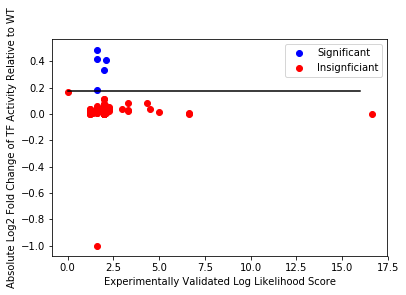

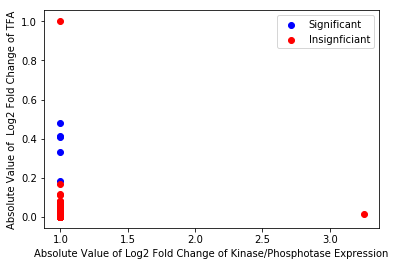

In [18]:
normalizedMatrix  = TFAHelp.absoluteLog2FoldChange(matrix)

outfile = open("kinaseTFInteractionLog2FoldChangeTFA.csv","w")
#match interactions
interactionsFound = {x[0]:-1 for x in expectedResults}
for tf in range(len(normalizedMatrix)-1):
    for kinase in range(len(normalizedMatrix[tf])):
        if kinases[kinase]+"_"+TFs[tf] in interactions:
            interactionsFound[kinases[kinase]+"_"+TFs[tf]] = normalizedMatrix[tf][kinase]
            outfile.write(kinases[kinase]+","+TFs[tf]+","+TFAHelp.systematic2Common[kinases[kinase]]+
                          ","+TFAHelp.systematic2Common[TFs[tf]]+","+str(normalizedMatrix[tf][kinase])+
                          "\n")
outfile.close()
allInteractions = TFAHelp.flatten(TFAHelp.absoluteLog2FoldChange(TFAHelp.TFAWholeMatrix[:-1]))
pvalsInteractionsFound = TFAHelp.getPValuesForInteractions(interactionsFound,allInteractions)
        
alpha = .05 #fixed to find signfificance

uniqueInteractions = [inter for inter in interactions]

significantFoundInteractions,insignificantInteractions = TFAHelp.catagorizeInteractionsForSignificance(alpha,pvalsInteractionsFound,False)
print(significantFoundInteractions)


plt.scatter([interactions[inter] for inter in significantFoundInteractions],[interactionsFound[inter] for inter in significantFoundInteractions],c = "b",label = "Significant")
plt.scatter([interactions[inter] for inter in insignificantInteractions],[interactionsFound[inter] for inter in insignificantInteractions],c="r",label = "Insignficiant")
plt.legend()
expectedInteractionLogScores = [interactions[inter] for inter in uniqueInteractions]
minLogScore = int(min(expectedInteractionLogScores))
maxLogScore = int(max(expectedInteractionLogScores)+1)

allInteractions.sort(reverse=True)
scoreCutoffHigh = allInteractions[int(np.floor((alpha)*len(allInteractions)))]

print("Number of Found Significant Interactions: ",len(uniqueInteractions),len(significantFoundInteractions),"; alpha = ",alpha,scoreCutoffHigh)


plt.plot([x for x in range(minLogScore,maxLogScore)],[scoreCutoffHigh for _ in range(minLogScore,maxLogScore)],c="black")

plt.xlabel("Experimentally Validated Log Likelihood Score")
plt.ylabel("Absolute Log2 Fold Change of TF Activity Relative to WT") 


GEImpact = {inter:-1 for inter in uniqueInteractions}
xvals = []
yvals = []
for inter in uniqueInteractions:
    kinase = inter.split("_")[0]
    try:
        kianseStdScore = np.abs(geneExpression[kinase]["ratio"][kinase])
        GEImpact[inter] = kianseStdScore
        xvals.append(abs(kianseStdScore))
        yvals.append(abs(interactionsFound[inter]))
    except:
        pass

plt.figure()
plt.scatter([abs(GEImpact[inter]) for inter in significantFoundInteractions],[abs(interactionsFound[inter]) for inter in significantFoundInteractions],c = "b",label = "Significant")
plt.scatter([abs(GEImpact[inter]) for inter in insignificantInteractions],[abs(interactionsFound[inter]) for inter in insignificantInteractions],c="r",label = "Insignficiant")
plt.legend()
plt.xlabel("Absolute Value of Log2 Fold Change of Kinase/Phosphotase Expression")
plt.ylabel("Absolute Value of  Log2 Fold Change of TFA")



positions = range(len(xvals))
positions.sort(key=lambda x: xvals[x])
xvals = [xvals[x] for x in positions]
yvals = [yvals[x] for x in positions]
slope,intercept,r,pvalue,_ = stats.linregress(xvals, yvals)
plt.plot(xvals,[x*slope+intercept for x in xvals],"r-")
print(r**2,pvalue)

0.975113636364


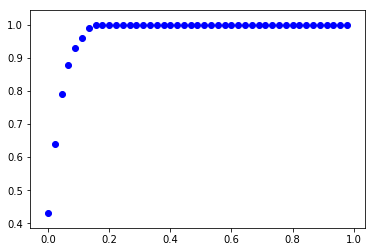

In [6]:
#Determine best Possible AUC
bestPossibleMatrix = copy.deepcopy(matrix)
maxScore = max(TFAHelp.flatten(TFAHelp.absoluteLog2FoldChange(bestPossibleMatrix)))
for tf in range(len(bestPossibleMatrix)-1):
    for kinase in range(len(bestPossibleMatrix[tf])):
        if kinases[kinase]+"_"+TFs[tf] in interactions:
            bestPossibleMatrix[tf][kinase] = bestPossibleMatrix[tf][-1]*((2**maxScore))+1
normalizedMatrix = TFAHelp.rankingChange(bestPossibleMatrix)
interactionsFound = {}

for tf in range(len(normalizedMatrix)-1):
    for kinase in range(len(normalizedMatrix[tf])):
        if kinases[kinase]+"_"+TFs[tf] in interactions:
            interactionsFound[kinases[kinase]+"_"+TFs[tf]] = normalizedMatrix[tf][kinase]
                                                                                 
plt.figure()

xcoords,ycoords = TFAHelp.expectedInteractionFallInRankingLevel(interactionsFound,len(normalizedMatrix))
AUC = np.trapz(ycoords,dx = 1.0/(len(xcoords)-1))
print(AUC)

plt.scatter(xcoords,ycoords,c="b")

In [7]:
normalizedMatrix  = TFAHelp.rankingChange(matrix)[:-1]

#match interactions
interactionsFound = {}
bestPossibleInteractionsFound = {}
for tf in range(len(normalizedMatrix)-1):
    for kinase in range(len(normalizedMatrix[tf])):
        if kinases[kinase]+"_"+TFs[tf] in interactions:
            interactionsFound[kinases[kinase]+"_"+TFs[tf]] = normalizedMatrix[tf][kinase]
uniqueInteractions = [inter for inter in interactions]

GEImpact = {inter:-1 for inter in uniqueInteractions}
xvals = []
yvals = []
for inter in interactionsFound:
	kinase = inter.split("_")[0]
	kianseStdScore = np.abs(geneExpression[kinase]["ratio"][kinase])
	GEImpact[inter] = kianseStdScore
	xvals.append(abs(kianseStdScore))
	yvals.append(abs(interactionsFound[inter]))

plt.figure()
plt.scatter([abs(GEImpact[inter]) for inter in interactionsFound],[abs(interactionsFound[inter]) for inter in interactionsFound])
plt.xlabel("Absolute Value of Log2 Fold Change of Kinase/Phosphotase Expression")
plt.ylabel("Ranking of TFA Log2FC Relative to WT Within Condition")

positions = range(len(xvals))
positions.sort(key=lambda x: xvals[x])
xvals = [xvals[x] for x in positions]
yvals = [yvals[x] for x in positions]
slope,intercept,r,pvalue,_ = stats.linregress(xvals, yvals)
plt.plot(xvals,[x*slope+intercept for x in xvals],"r-")
print(r**2,pvalue)

###Generate Random Matrices to find Results:

plt.figure()

xcoords,ycoords = TFAHelp.expectedInteractionFallInRankingLevel(interactionsFound,len(normalizedMatrix)-1)
AUC = np.trapz(ycoords,dx = 1.0/(len(xcoords)-1))

plt.scatter(xcoords,ycoords,c="b")


nsims = 1000
allxCoords = []
allyCoords = []
AUCs = []
for _ in range(nsims):
    tempMat = TFAHelp.generateRandomMatrix([row[:-1] for row in matrix])
    tempMat = [tempMat[row] + [matrix[row][-1]] for row in range(len(tempMat))]
    tempNormMat = TFAHelp.rankingChange(tempMat)
    tempinteractionsFound = {x[0]:-1 for x in expectedResults}
    for tf in range(len(normalizedMatrix)-1):
        for kinase in range(len(normalizedMatrix[tf])):
            if kinases[kinase]+"_"+TFs[tf] in interactions:
                tempinteractionsFound[kinases[kinase]+"_"+TFs[tf]] = tempNormMat[tf][kinase]
    xcoords,ycoords = TFAHelp.expectedInteractionFallInRankingLevel(tempinteractionsFound,len(normalizedMatrix)-1)
    AUCs.append(np.trapz(ycoords,dx = 1.0/(len(xcoords)-1)))
    allxCoords.append(xcoords)
    allyCoords.append(ycoords)

AUCs.sort(reverse=True)
index = 0
for val in AUCs:
    if AUC > val:
        index -= 1
        break
    index+=1
percentile = float(index)/len(AUCs)

print(AUC,percentile)
    
plt.errorbar(x = xcoords,y = np.mean(allyCoords,axis = 0),
             yerr = np.std(allyCoords,axis=0))
    
plt.xlabel("Percent of Total # of TFs sorted by Change in Activity")
plt.ylabel("Percent of TFs with known interactions")




KeyError: 'ykl139w'

TFHelp.py:307: RuntimeWarning: invalid value encountered in double_scalars
  tempMat[x] = [(val-tempMin)/tempMax for val in tempMat[x]]


0.9999999999999998
(0.15115440115440115, 0.968)


Text(0,0.5,'Percent of TFs with known interactions')

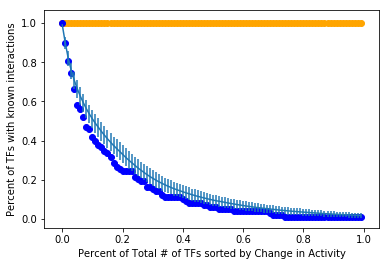

In [10]:
bestPossibleMatrix = copy.deepcopy(matrix)
maxScore = max(TFAHelp.flatten(TFAHelp.absoluteLog2FoldChange(bestPossibleMatrix)))
for tf in range(len(bestPossibleMatrix)-1):
    for kinase in range(len(bestPossibleMatrix[tf])):
        if kinases[kinase]+"_"+TFs[tf] in interactions:
            bestPossibleMatrix[tf][kinase] = bestPossibleMatrix[tf][-1]*((2**maxScore))
normalizedMatrix = TFAHelp.rankingChangePercentile(bestPossibleMatrix)
interactionsFound = {}

for tf in range(len(normalizedMatrix)-1):
    for kinase in range(len(normalizedMatrix[tf])):
        if kinases[kinase]+"_"+TFs[tf] in interactions:
            interactionsFound[kinases[kinase]+"_"+TFs[tf]] = normalizedMatrix[tf][kinase]
                                                                                 
plt.figure()

xcoords,ycoords = TFAHelp.expectedInteractionFallInPercentileLevel(interactionsFound)
AUC = np.trapz(ycoords,dx = 1.0/(len(xcoords)-1))
print(AUC)

plt.scatter(xcoords,ycoords,c="orange")



normalizedMatrix  = TFAHelp.rankingChangePercentile(matrix)[:-1]

#match interactions
interactionsFound = {}
bestPossibleInteractionsFound = {}
for tf in range(len(normalizedMatrix)-1):
    for kinase in range(len(normalizedMatrix[tf])):
        if kinases[kinase]+"_"+TFs[tf] in interactions:
            interactionsFound[kinases[kinase]+"_"+TFs[tf]] = normalizedMatrix[tf][kinase]

###Generate Random Matrices to find Results:

xcoords,ycoords = TFAHelp.expectedInteractionFallInPercentileLevel(interactionsFound)
AUC = np.trapz(ycoords,dx = 1.0/(len(xcoords)-1))

plt.scatter(xcoords,ycoords,c="b")


nsims = 1000
allxCoords = []
allyCoords = []
AUCs = []
for _ in range(nsims):
    tempMat = TFAHelp.generateRandomMatrix([row[:-1] for row in matrix])
    tempMat = [tempMat[row] + [matrix[row][-1]] for row in range(len(tempMat))]
    tempNormMat = TFAHelp.rankingChangePercentile(tempMat)
    tempinteractionsFound = {x[0]:-1 for x in expectedResults}
    for tf in range(len(normalizedMatrix)-1):
        for kinase in range(len(normalizedMatrix[tf])):
            if kinases[kinase]+"_"+TFs[tf] in interactions:
                tempinteractionsFound[kinases[kinase]+"_"+TFs[tf]] = tempNormMat[tf][kinase]
    xcoords,ycoords = TFAHelp.expectedInteractionFallInPercentileLevel(tempinteractionsFound)
    AUCs.append(np.trapz(ycoords,dx = 1.0/(len(xcoords)-1)))
    allxCoords.append(xcoords)
    allyCoords.append(ycoords)

AUCs.sort(reverse=True)
index = 0
for val in AUCs:
    if AUC > val:
        index -= 1
        break
    index+=1
percentile = float(index)/len(AUCs)

print(AUC,percentile)
    
plt.errorbar(x = xcoords,y = np.mean(allyCoords,axis = 0),
             yerr = np.std(allyCoords,axis=0))
    
plt.xlabel("Percent of Total # of TFs sorted by Change in Activity")
plt.ylabel("Percent of TFs with known interactions")




(1.9714285714285713, 0.43316289262235219)
(3.0, 0.43803559657218194)
(3.0, 0.45410783055198978)
(1.9714285714285713, 0.46238130021913815)
(3.0, 0.41302952503209239)
(0.4285714285714286, 0.43311403508771934)
(3.0, 0.41199736321687547)
(3.0, 0.4451219512195122)
(3.0, 0.43777360850531583)
(3.0, 0.46181001283697048)
44
(0.017695007355142324, 0.33295741088417541)
(0.43525498891352554, 0.897)


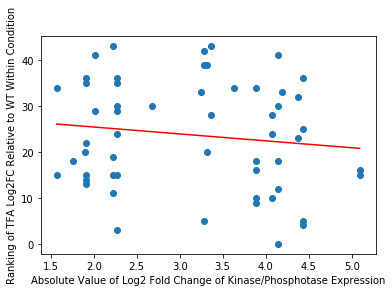

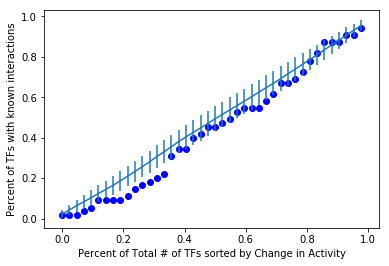

In [6]:

tfvaRangeMatrix = [[TFVARange[row][col] for col in columnsOfInterest]+[TFVARange[row][-1]] for row in
                   range(len(TFVARange)-1)]

TFARangeSize = [[(max(col1)-min(col1))/col2 for col1,col2 in zip(row1,row2)] for row1,row2 in zip(TFVARange,TFAVariable)]
interactions2 = [inter for inter in interactions]
meanCutoff = 0

for x in range(10):
    bestCutoff = 0.2
    bestAUC = 0.0
    bestStdCutoff = 0
    #plt.figure()
    random.shuffle(interactions2)
    tempinteractions = interactions2[:int(.7*len(interactions2))]

    for cutoff in np.linspace(.2,3,50):
        try:
            matrix2 = [[col for col in matrix[row]] for row in range(len(matrix)-1)
                            if np.mean(TFARangeSize[row]) <= cutoff]
            tempTFs = [TFs[row] for row in range(len(matrix)-1) if np.mean(TFARangeSize[row]) <= cutoff]
            normalizedMatrix  = TFAHelp.rankingChange(matrix2)[:-1]

            interactionsFound = {}
            for tf in range(len(normalizedMatrix)-1):
                for kinase in range(len(normalizedMatrix[tf])):
                    if kinases[kinase]+"_"+tempTFs[tf] in tempinteractions:
                        interactionsFound[kinases[kinase]+"_"+TFs[tf]] = normalizedMatrix[tf][kinase]

            xcoords,ycoords = TFAHelp.expectedInteractionFallInRankingLevel(interactionsFound,len(normalizedMatrix)-1)
            AUC = np.trapz(ycoords,dx = 1.0/(len(xcoords)-1))
            #if len(matrix2) >= .4 * len(matrix): plt.scatter([cutoff],[AUC])
            if AUC >= bestAUC and len(matrix2) >= .4 * len(matrix):
                bestAUC = AUC
                bestCutoff = cutoff
        except:
            pass

    print(bestCutoff,bestAUC)
    meanCutoff += bestCutoff/10
bestCutoff = meanCutoff
matrix2 = [[col for col in matrix[row]] for row in range(len(matrix)-1)
                if np.mean(TFARangeSize[row]) <= bestCutoff ]
tempTFs = [TFs[row] for row in range(len(matrix)-1)]
#matrix2 = [[col for col in matrix[row]] for row in range(len(matrix)-1)
#                    if np.mean(TFARangeSize[row]) <= bestCutoff]


print(len(matrix2))
normalizedMatrix  = TFAHelp.rankingChange(matrix2)[:-1]

#match interactions
interactionsFound = {}
for tf in range(len(normalizedMatrix)-1):
    for kinase in range(len(normalizedMatrix[tf])):
        if kinases[kinase]+"_"+tempTFs[tf] in interactions:
            interactionsFound[kinases[kinase]+"_"+TFs[tf]] = normalizedMatrix[tf][kinase]
uniqueInteractions = [inter for inter in interactions]

GEImpact = {inter:-1 for inter in uniqueInteractions}
xvals = []
yvals = []
for inter in interactionsFound:
	kinase = inter.split("_")[0]
	kianseStdScore = np.abs(geneExpression[kinase]["ratio"][kinase])
	GEImpact[inter] = kianseStdScore
	xvals.append(abs(kianseStdScore))
	yvals.append(abs(interactionsFound[inter]))

plt.figure()
plt.scatter([abs(GEImpact[inter]) for inter in interactionsFound],[abs(interactionsFound[inter]) for inter in interactionsFound])
plt.xlabel("Absolute Value of Log2 Fold Change of Kinase/Phosphotase Expression")
plt.ylabel("Ranking of TFA Log2FC Relative to WT Within Condition")

positions = range(len(xvals))
positions.sort(key=lambda x: xvals[x])
xvals = [xvals[x] for x in positions]
yvals = [yvals[x] for x in positions]
slope,intercept,r,pvalue,_ = stats.linregress(xvals, yvals)
plt.plot(xvals,[x*slope+intercept for x in xvals],"r-")
print(r**2,pvalue)

###Generate Random Matrices to find Results:
plt.figure()

xcoords,ycoords = TFAHelp.expectedInteractionFallInRankingLevel(interactionsFound,len(normalizedMatrix)-1)
AUC = np.trapz(ycoords,dx = 1.0/(len(xcoords)-1))

plt.scatter(xcoords,ycoords,c="b")


nsims = 1000
allxCoords = []
allyCoords = []
AUCs = []
for _ in range(nsims):
    tempMat = TFAHelp.generateRandomMatrix([row[:-1] for row in matrix2])
    tempMat = [tempMat[row] + [matrix2[row][-1]] for row in range(len(tempMat))]
    tempNormMat = TFAHelp.rankingChange(tempMat)
    tempinteractionsFound = {}
    for tf in range(len(normalizedMatrix)-1):
        for kinase in range(len(normalizedMatrix[tf])):
            if kinases[kinase]+"_"+TFs[tf] in interactions:
                tempinteractionsFound[kinases[kinase]+"_"+tempTFs[tf]] = tempNormMat[tf][kinase]
    xcoords,ycoords = TFAHelp.expectedInteractionFallInRankingLevel(tempinteractionsFound,len(normalizedMatrix)-1)
    AUCs.append(np.trapz(ycoords,dx = 1.0/(len(xcoords)-1)))
    allxCoords.append(xcoords)
    allyCoords.append(ycoords)

AUCs.sort(reverse=True)
index = 0
for val in AUCs:
    if AUC > val:
        index -= 1
        break
    index+=1
percentile = float(index)/len(AUCs)

print(AUC,percentile)
    
plt.errorbar(x = xcoords,y = np.mean(allyCoords,axis = 0),
             yerr = np.std(allyCoords,axis=0))
    
plt.xlabel("Percent of Total # of TFs sorted by Change in Activity")
plt.ylabel("Percent of TFs with known interactions")




TFHelp.py:402: RuntimeWarning: divide by zero encountered in double_scalars
  return min([abs(np.log2(max(A)/max(B))),abs(np.log2(min(A)/min(B)))])
TFHelp.py:402: RuntimeWarning: invalid value encountered in double_scalars
  return min([abs(np.log2(max(A)/max(B))),abs(np.log2(min(A)/min(B)))])
TFHelp.py:402: RuntimeWarning: divide by zero encountered in log2
  return min([abs(np.log2(max(A)/max(B))),abs(np.log2(min(A)/min(B)))])


0.121660729345
(0.44000471475719, 0.947)


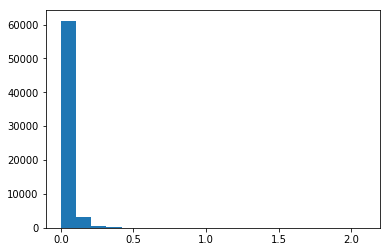

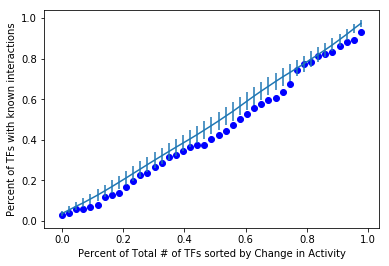

In [8]:

matrix = copy.deepcopy(TFVARange)
wt = [matrix[row][-1] for row in range(len(matrix))] 
matrix = [[matrix[row][col] for col in columnsOfInterest]+[wt[row]] for row in range(len(matrix)-1)]


TFAHelp = TFAHelper(TFAHelp.distFromWTRange(TFVARange[:-1]))
allScores = TFAHelp.flatten(TFAHelp.TFAWholeMatrix)
allScores.sort(reverse=True)
print(allScores[int(len(allScores)*.05)])

normalizedMatrixRaw = TFAHelp.distFromWTRange(matrix)

normalizedMatrix  = TFAHelp.rankingChangeV(matrix)

#match interactions
interactionsFound = {x[0]:-1 for x in expectedResults}
interactionsFoundRaw = {x[0]:-1 for x in expectedResults}
for tf in range(len(normalizedMatrix)-1):
    for kinase in range(len(normalizedMatrix[tf])):
        if kinases[kinase]+"_"+TFs[tf] in interactions:
            interactionsFound[kinases[kinase]+"_"+TFs[tf]] = normalizedMatrix[tf][kinase]
            interactionsFoundRaw[kinases[kinase]+"_"+TFs[tf]] = normalizedMatrixRaw[tf][kinase]

            
uniqueInteractions = [inter for inter in interactions]

GEImpact = {inter:-1 for inter in uniqueInteractions}
xvals = []
yvals = []
# for inter in uniqueInteractions:
# 	kinase = inter.split("_")[0]
# 	#kianseStdScore = np.abs(geneExpression[kinase]["ratio"][kinase])
# 	#GEImpact[inter] = kianseStdScore
# 	#xvals.append(abs(kianseStdScore))
# 	#yvals.append(abs(interactionsFoundRaw[inter]))

# plt.figure()
# #plt.scatter([abs(GEImpact[inter]) for inter in interactionsFound],[abs(interactionsFoundRaw[inter]) for inter in interactionsFound])
# #plt.xlabel("Absolute Value of Log2 Fold Change of Kinase/Phosphotase Expression")
# #plt.ylabel("Ranking of TFA Range Difference Relative to WT Within Condition")

# positions = range(len(xvals))
# positions.sort(key=lambda x: xvals[x])
# xvals = [xvals[x] for x in positions]
# yvals = [yvals[x] for x in positions]
# slope,intercept,r,pvalue,_ = stats.linregress(xvals, yvals)

# plt.plot(xvals,[x*slope+intercept for x in xvals],"r-")
# print(r**2,pvalue)

plt.figure()

plt.hist(allScores,bins = 20)




###Generate Random Matrices to find Results:
plt.figure()

xcoords,ycoords = TFAHelp.expectedInteractionFallInRankingLevel(interactionsFound,len(normalizedMatrix)-1)
AUC = np.trapz(ycoords,dx = 1.0/(len(xcoords)-1))

plt.scatter(xcoords,ycoords,c="b")


nsims = 1000
allxCoords = []
allyCoords = []
AUCs = []
for _ in range(nsims):
    tempMat = TFAHelp.generateRandomMatrix([row[:-1] for row in matrix])
    tempMat = [tempMat[row] + [matrix[row][-1]] for row in range(len(tempMat))]
    tempNormMat = TFAHelp.rankingChangeV(tempMat)
    tempinteractionsFound = {x[0]:-1 for x in expectedResults}
    for tf in range(len(normalizedMatrix)-1):
        for kinase in range(len(normalizedMatrix[tf])):
            if kinases[kinase]+"_"+TFs[tf] in interactions:
                tempinteractionsFound[kinases[kinase]+"_"+TFs[tf]] = tempNormMat[tf][kinase]
    xcoords,ycoords = TFAHelp.expectedInteractionFallInRankingLevel(tempinteractionsFound,len(normalizedMatrix)-1)
    AUCs.append(np.trapz(ycoords,dx = 1.0/(len(xcoords)-1)))
    allxCoords.append(xcoords)
    allyCoords.append(ycoords)

AUCs.sort(reverse=True)
index = 0
for val in AUCs:
    if AUC > val:
        index -= 1
        break
    index+=1
percentile = float(index)/len(AUCs)

print(AUC,percentile)
    
plt.errorbar(x = xcoords,y = np.mean(allyCoords,axis = 0),
             yerr = np.std(allyCoords,axis=0))
    
plt.xlabel("Percent of Total # of TFs sorted by Change in Activity")
plt.ylabel("Percent of TFs with known interactions")





In [12]:
TFAHelp.writeMatrix2csv(normalizedMatrix,open("normalizedTFAMatrix.csv","w"))

(1.7938970987533074, 0.16341688457416392)


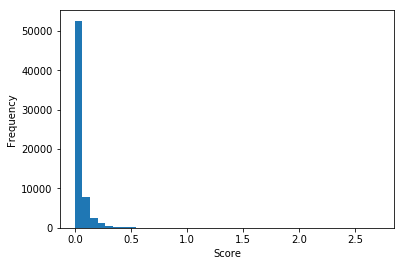

In [11]:
#overall distribution and statistical test

plt.figure()
plt.hist(allInteractions, bins = 40)
plt.xlabel("Score")
plt.ylabel("Frequency")

a = len(significantFoundInteractions)
b = len(uniqueInteractions)-a
c = int(alpha*len(allInteractions)) - a
d = len(allInteractions) - a - b - c

print(stats.fisher_exact([[a,b],[c,d]],alternative = "greater"))
